In [1]:
from random import randint
from random import seed

Equation: T(n) = 2T(n/2) + cn

Let Depth = i and input size = n

The relationship between depth and input size is : $$ {\mathbf{2}^{i}} = n $$ or $$ i = \log _{2} n $$

The cost for each node is: $$ (n/2^i) $$

Number of node is :  $$ {\mathbf{2}^{i}} $$

The total cost for each depth is : $$ \frac{n}{2^i} * 2^i = n $$

The cost is equal at every depth so,

Case 3: Average = H * W = $$ n * \log _{2} n $$




In [4]:
from time import time
import math
def subarray(a,low,high):
    if high == low:
        # print("hello")
        return (low,high,a[low])
    else:
        mid = int((low + high)/2)
        # print(mid) # low = 0,mid = 2,high = 5
        left_low,left_high,left_sum = subarray(a,low,mid) #0,1,2
        # print("left low",left_low)
        # print("left high",left_high)
        # print("left sum",left_sum)
        right_low,right_high,right_sum = subarray(a,mid+1,high) #3,4,5
        # print("right low",right_low)
        # print("right high",right_high)
        # print("right sum",right_sum)
        cross_low,cross_high,cross_sum = cross(a,low,mid,high)
        # print("cross low",cross_low)
        # print("cross high",cross_high)
        # print("cross sum",cross_sum)
        if left_sum >= right_sum and left_sum >= cross_sum:
            return (left_low,left_high,left_sum)
        elif right_sum >= left_sum and right_sum >= cross_sum:
            return (right_low,right_high,right_sum)
        else:
            return (cross_low,cross_high,cross_sum)
def cross(a,low,mid,high):
    max_left = 0
    max_right = 0
    left_sum = -float("inf")
    sum = 0
    for i in range(mid,low-1,-1):
        sum = sum + a[i]
        # print(sum)
        if sum > left_sum:
            left_sum = sum
            max_left = i
    right_sum = -float("inf")
    sum = 0
    for j in range(mid+1,high+1):
        sum = sum + a[j]
        # print(sum)
        if sum > right_sum:
            right_sum = sum
            max_right = j
    return (max_left,max_right,left_sum + right_sum)
        
n = []
real_time = []
theo_time = []
c = 1/500000
for i in range(0,1001,100):
    a = []
    seed(18)
    for j in range(i+1):
        value = randint(-30,30)
        a.append(value)
    # print(a)
    low = 0
    high = len(a) - 1
    start = time()
    index_left,index_right,value = subarray(a,low,high)
    time_taken = time() - start
    # print(time_taken)
    n.append(len(a))
    real_time.append(time_taken)
    theo_time.append(c*(len(a))*math.log(len(a),2))
# print(f"left index is: {index_left} which is the number {a[index_left]}")
# print(f"right index is: {index_right} which is the number {a[index_right]}")
# print("the total value is:",value)


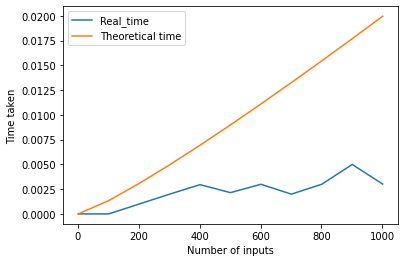

real_time [0.0, 0.0, 0.0009970664978027344, 0.001995086669921875, 0.0029535293579101562, 0.002147197723388672, 0.002991199493408203, 0.0019943714141845703, 0.0029959678649902344, 0.004990816116333008, 0.003011465072631836]
theoretical_time [0.0, 0.0013449587195158627, 0.003075722779853929, 0.00495663904540934, 0.006935261658016847, 0.008986604126781598, 0.011095927859214845, 0.013253485428882895, 0.015452344808718753, 0.017687320699055997, 0.019954386970189655]


In [5]:
import matplotlib.pyplot as plt
plt.plot(n,real_time, label = "Real_time")
plt.plot(n,theo_time, label = "Theoretical time")
plt.xlabel("Number of inputs")
plt.ylabel("Time taken")
plt.legend()
plt.show()
print("real_time", real_time)
print("theoretical_time", theo_time)

Conclusion: by using c = 1/500000 , The theoretical time is always longer than the actual time, it's acting like the upper bound of the actual time